In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

## May 9, 2019
#### 1-1 ratings of *The Flash* drama

In [2]:
scores = [10,9,7,9,10,8,10,10,7,10,9,8.5,10,5,10,10,8]

In [83]:
np.average(scores),np.std(scores)

(8.852941176470589, 1.411764705882353)

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  3., 11.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

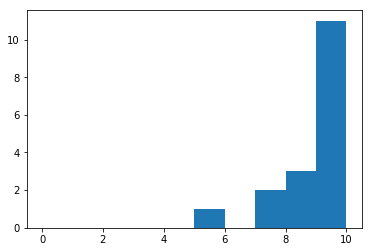

In [84]:
plt.hist(scores,bins=range(0,11))

#### Playing with Seaborn car crashes dataset

In [85]:
sns.get_dataset_names()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\user\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [122]:
crash = sns.load_dataset("car_crashes")

In [123]:
crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [124]:
crash.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [125]:
# crash['abbrev']
# Looks like we have a line for every state and DC

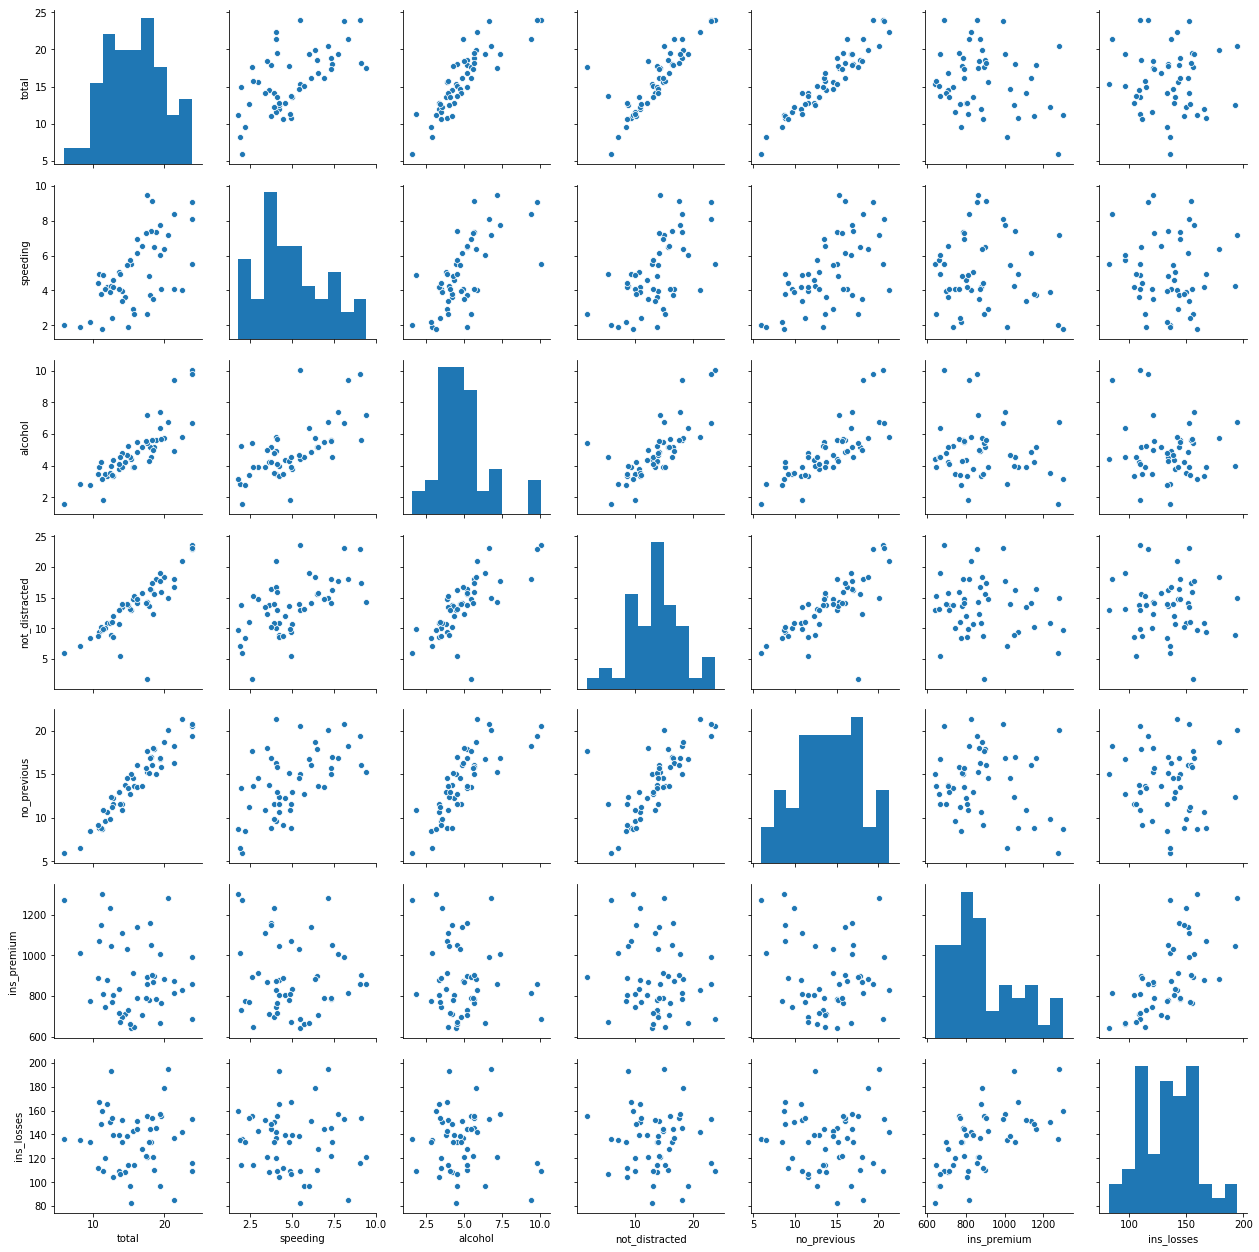

In [126]:
sns.pairplot(crash)
# Data is kind of meaningless because it hasn't been divided by the total number of accidents

In [127]:
crash['alcpc']=crash['alcohol']/crash['total']
crash['focuspc']=crash['not_distracted']/crash['total']
crash['noprevpc']=crash['no_previous']/crash['total']
crash['speedingpc']=crash['speeding']/crash['total']
# Reorder columns
crash=crash[['total', 'speeding','speedingpc', 'alcohol','alcpc', 'not_distracted','focuspc', 'no_previous', 'noprevpc','ins_premium', 'ins_losses', 'abbrev']]
crash.head()

,total,speeding,speedingpc,alcohol,alcpc,not_distracted,focuspc,no_previous,noprevpc,ins_premium,ins_losses,abbrev
0,18.8,7.332,0.39,5.640,0.30,18.048,0.96,15.040,0.80,784.55,145.08,AL
1,18.1,7.421,0.41,4.525,0.25,16.290,0.90,17.014,0.94,1053.48,133.93,AK
2,18.6,6.510,0.35,5.208,0.28,15.624,0.84,17.856,0.96,899.47,110.35,AZ
3,22.4,4.032,0.18,5.824,0.26,21.056,0.94,21.280,0.95,827.34,142.39,AR
4,12.0,4.200,0.35,3.360,0.28,10.920,0.91,10.680,0.89,878.41,165.63,CA


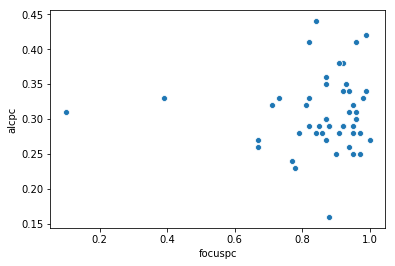

In [128]:
sns.scatterplot(data=crash,x="focuspc",y="alcpc")

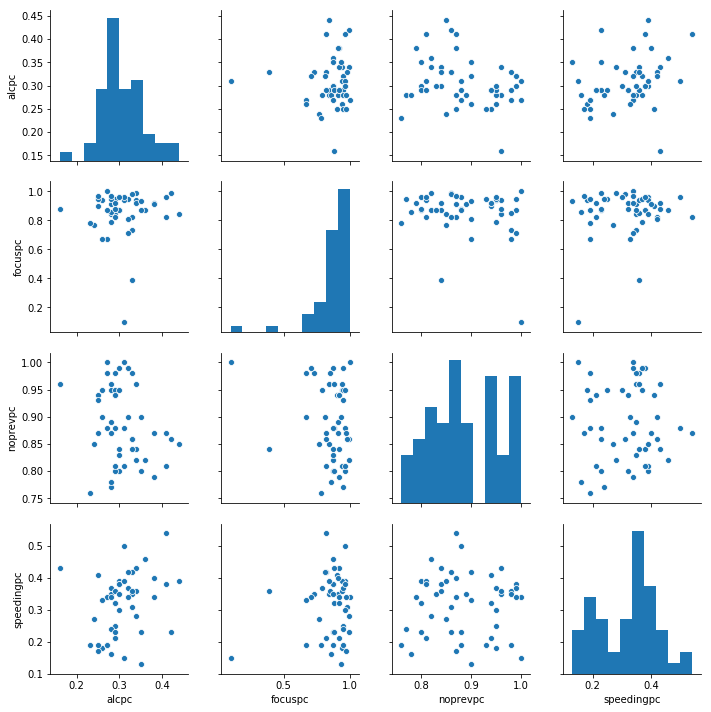

In [129]:
sns.pairplot(crash[['alcpc','focuspc','noprevpc','speedingpc']])

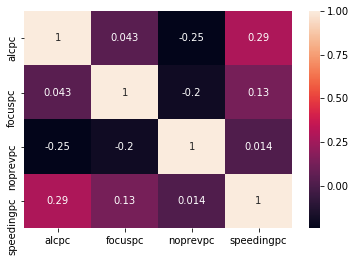

In [130]:
sns.heatmap(crash[['alcpc','focuspc','noprevpc','speedingpc']].corr(),annot=True)

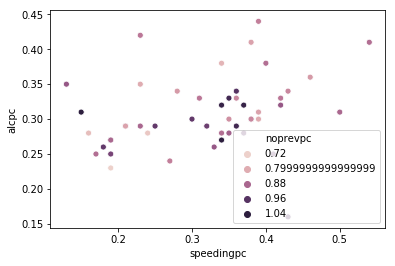

In [131]:
sns.scatterplot('speedingpc','alcpc',data=crash,hue='noprevpc')

In [132]:
crash.head()

,total,speeding,speedingpc,alcohol,alcpc,not_distracted,focuspc,no_previous,noprevpc,ins_premium,ins_losses,abbrev
0,18.8,7.332,0.39,5.640,0.30,18.048,0.96,15.040,0.80,784.55,145.08,AL
1,18.1,7.421,0.41,4.525,0.25,16.290,0.90,17.014,0.94,1053.48,133.93,AK
2,18.6,6.510,0.35,5.208,0.28,15.624,0.84,17.856,0.96,899.47,110.35,AZ
3,22.4,4.032,0.18,5.824,0.26,21.056,0.94,21.280,0.95,827.34,142.39,AR
4,12.0,4.200,0.35,3.360,0.28,10.920,0.91,10.680,0.89,878.41,165.63,CA


In [133]:
features = ['alcpc','focuspc','noprevpc','speedingpc']

for n in range(2,10):
    model = KMeans(n_clusters = n)
    model.fit(crash[features])
    crash['kmeans{}'.format(n)]=model.labels_

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [134]:
crash.head()

,total,speeding,speedingpc,alcohol,alcpc,not_distracted,focuspc,no_previous,noprevpc,ins_premium,ins_losses,abbrev,kmeans2,kmeans3,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,kmeans9
0,18.8,7.332,0.39,5.640,0.30,18.048,0.96,15.040,0.80,784.55,145.08,AL,0,0,0,2,0,2,7,3
1,18.1,7.421,0.41,4.525,0.25,16.290,0.90,17.014,0.94,1053.48,133.93,AK,0,0,0,0,1,4,3,1
2,18.6,6.510,0.35,5.208,0.28,15.624,0.84,17.856,0.96,899.47,110.35,AZ,0,0,0,0,1,4,3,1
3,22.4,4.032,0.18,5.824,0.26,21.056,0.94,21.280,0.95,827.34,142.39,AR,0,2,1,4,3,1,5,0
4,12.0,4.200,0.35,3.360,0.28,10.920,0.91,10.680,0.89,878.41,165.63,CA,0,0,0,0,1,4,7,1


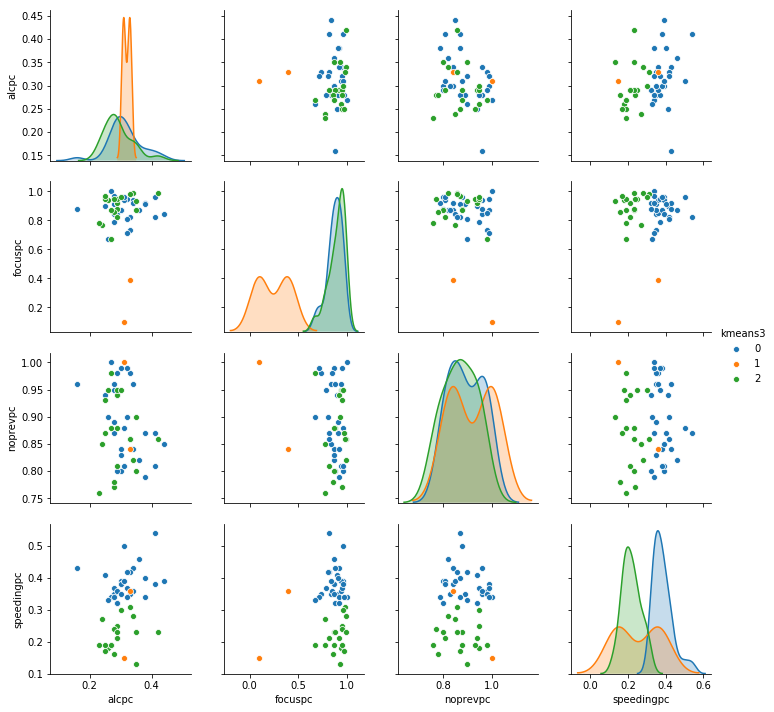

In [141]:
sns.pairplot(data=crash,x_vars=features, y_vars=features,hue="kmeans3")

In [147]:
# Note that these two were grouped into a new category almost entirely on the basis of their low focuspc.
# Also, the other two categories are basically split by speeding.
crash[crash['kmeans3']==1]

,total,speeding,speedingpc,alcohol,alcpc,not_distracted,focuspc,no_previous,noprevpc,ins_premium,ins_losses,abbrev,kmeans2,kmeans3,kmeans4,kmeans5,kmeans6,kmeans7,kmeans8,kmeans9
24,17.6,2.640,0.15,5.456,0.31,1.760,0.10,17.600,1.00,896.07,155.77,MS,1,1,3,3,2,3,4,2
49,13.8,4.968,0.36,4.554,0.33,5.382,0.39,11.592,0.84,670.31,106.62,WI,1,1,3,3,2,5,2,6


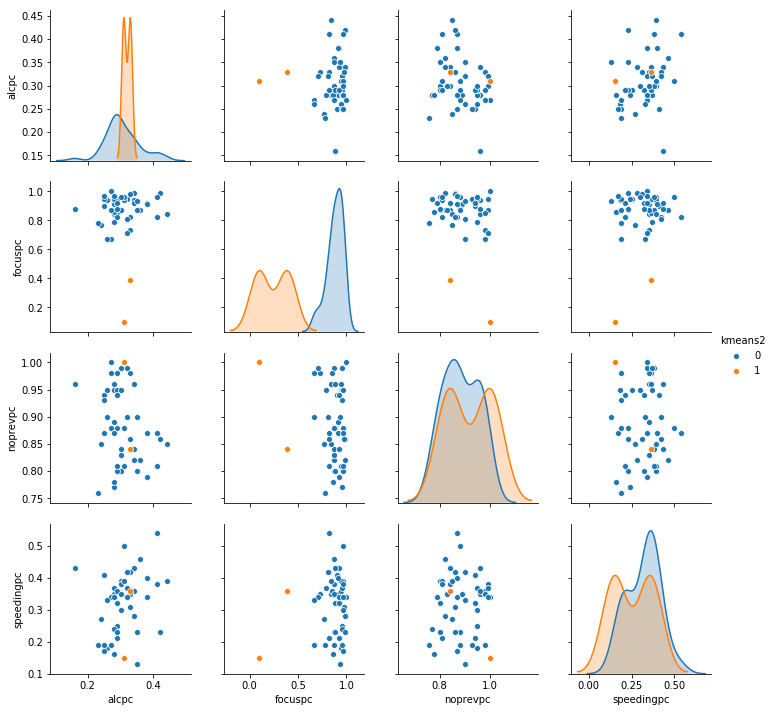

In [148]:
sns.pairplot(data=crash,x_vars=features, y_vars=features,hue="kmeans2")

## May 16, 2019

2018 SAT scores and turnout by college major

In [83]:
sat = pd.read_csv("2018sat.csv")
sat['TestTakers']=sat['TestTakers'].apply(lambda i: int(i.replace(',','')))
sat['Percent']=sat['Percent'].apply(lambda i: .01 * int(i.replace('%','')))

In [38]:
sat.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ERW,Math
0,"Agriculture,AgricultureOperations,andRelatedSc...",21353,0.01,1000,507,493
1,ArchitectureandRelatedServices,25197,0.01,1062,527,535
2,"Area,Ethnic,Cultural,andGenderStudies",2053,0.00,1060,547,513
3,BiologicalandBiomedicalSciences,135986,0.08,1152,579,573
4,"Business,Management,Marketing,andRelatedSuppor...",204651,0.12,1087,542,545


In [39]:
sat.describe()

,TestTakers,Percent,Total,ERW,Math
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,46826.684211,0.026053,1068.578947,540.763158,527.815789
std,71172.070104,0.041495,79.866656,40.177602,42.130335
min,249.000000,0.000000,938.000000,468.000000,463.000000
25%,5633.000000,0.000000,1002.000000,509.500000,491.500000
50%,15590.500000,0.010000,1074.500000,547.000000,528.500000
75%,58299.250000,0.035000,1117.500000,573.500000,545.000000
max,333289.000000,0.190000,1253.000000,603.000000,650.000000


In [40]:
sum(sat['Percent'])

0.9900000000000001

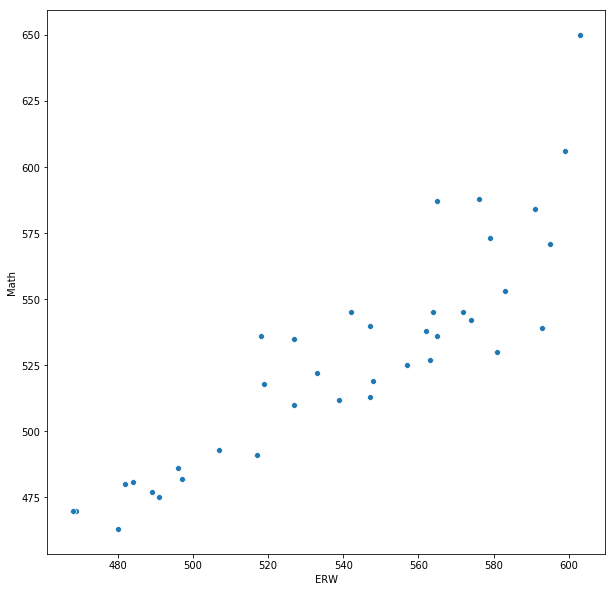

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot("ERW","Math",data=sat)
# Notice that the two subscores are highly correlated with each other,
# but the sd increases at the higher end

In [43]:
model = LinearRegression()
model.fit(np.array(sat['ERW']).reshape(-1,1),sat['Math'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
model.coef_,model.intercept_

(array([0.92478216]), 27.72767083138541)

In [46]:
sat[['ERW','Math']].corr()
# Note that this doesn't weight for the number of sitters in each category

,ERW,Math
ERW,1.000000,0.881919
Math,0.881919,1.000000


In [54]:
a= 3
[[sat['ERW'][a],sat['Math'][a]]] * sat['TestTakers'][a]

[[579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],
 [579, 573],

In [84]:
satF=[]
for a in sat.index:
    satF.append([[sat['ERW'][a],sat['Math'][a]]] * sat['TestTakers'][a])

In [86]:
satF.head()

In [77]:
pd.DataFrame(satF)

In [148]:
# I'm having trouble calling the items in satF well enough to run correlation calculations on them. 
# But that's the goal

## Predicting the age of next gf

In [15]:
right= [np.log(23),np.log(27),np.log(36)]
left = [[1,1,1],[4,2,1],[9,3,1]]
print(np.linalg.solve(left, right))
poly=np.poly1d(np.linalg.solve(left, right))

[ 0.06366971 -0.03066648  3.10249099]


In [16]:
np.log(36),poly(3)

(3.58351893845611, 3.58351893845611)

In [17]:
def age(d): return np.exp(poly(d))

In [18]:
for i in range(1,9):
    print((i,age(i)))

(1, 23.0)
(2, 27.0)
(3, 36.0)
(4, 54.5185185185185)
(5, 93.7752864381935)
(6, 183.20425722010918)
(7, 406.5233837888694)
(8, 1024.562156953338)


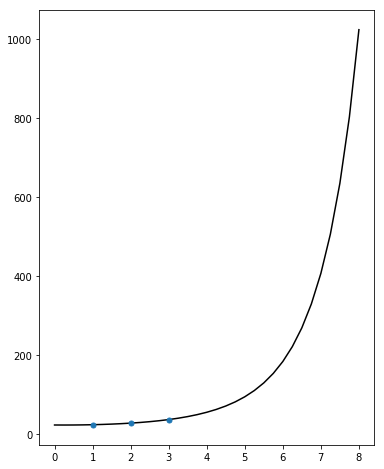

In [124]:
fig = plt.figure(figsize=(6,8))
x= np.linspace(0,8,33)
ax = fig.add_subplot(111)
ax.plot(x,age(x),color="black")
ax.plot([1,2,3],[23,27,36],linestyle="none",marker="o",markersize=5)

This was a weird function: a sort of speedy exponential of the form <code>y = exp(poly(x))</code> where poly is of degree 2. I want a straight exponential of the form <code>y = P(exp(rx) + c)</code>.

First observe that the gaps are equal, so any discrepancy between f(3)/f(2) and f(2)/f(1) should be explained by c.

This gives us the system of equations <code>(36 - c) / (27 - c) = (27 - c) / (23 - c)</code>, solved below.

**This solution didn't work because I applied the form of the function inconsistently (sometimes putting c inside, sometimes outside).**

In [125]:
c = (36 * 23 - 27 ** 2) / 5
c

19.8

We know <code>f(2) = 27 = Pe^(2r) + Pc</code>

And <code>f(1) - Pc = 23 - Pc = Pe^r</code>

Squaring the second yields <code>Pe^(2r) = (23 - Pc)^2</code>

Then to get P, we just need to solve the quadratic
- <code>27 = (23 - Pc)^2 + Pc</code>
- <code>27 = 529 - 46 Pc + P^2 c^2 + Pc</code>
- <code>0 = c^2 P^2  - 45c P  + 502</code>

In [ ]:
P = np.roots([c**2, -45*c,502])
P

Not sure which of these P values we want yet.

We know
- <code>23 = P(e^(r)) + Pc</code>
- <code>log((23 - c)/ (P)) = r)


In [144]:
r = np.log(23 - c) - np.log(P)
r

array([0.94765042, 1.13141495])

In [146]:
def age2(t,d): return P[d]*(np.exp(r[d] * t) + c)

In [147]:
for i in range(1,9):
    print((i,age2(i,0)))
for i in range(1,9):
    print((i,age2(i,1)))

(1, 27.761552812808787)
(2, 32.816405490293626)
(3, 45.856113039989616)
(4, 79.49388328381062)
(5, 166.26727008438127)
(6, 390.1114964484805)
(7, 967.5493437426076)
(8, 2457.1319561854243)
(1, 23.638447187191208)
(2, 30.35857458938763)
(3, 51.19123708588131)
(4, 115.77332023968661)
(5, 315.9803492349967)
(6, 936.6301100002178)
(7, 2860.6690784170087)
(8, 8825.26648263112)


**I worked out the correct coefficients on paper.**

The trick is to shift everything over, so use f(0) = 23, f(1) = 27, and so on. This makes the algebra easy. Then you just apply a horizontal translation and distribute it through to get the updated P value. This yields the following.

In [12]:
c = 19.8
P = 23 - c
r = np.log(27 - c) - np.log(P)
P = P / np.exp(r)
P, r, c

(1.4222222222222216, 0.810930216216329, 19.8)

In [13]:
def age2(t): return P*np.exp(r * t) + c

In [14]:
for i in range(1,9): print((i,age2(i)))

(1, 23.0)
(2, 27.0)
(3, 36.0)
(4, 56.250000000000014)
(5, 101.81250000000007)
(6, 204.32812500000009)
(7, 434.9882812500004)
(8, 953.9736328125014)


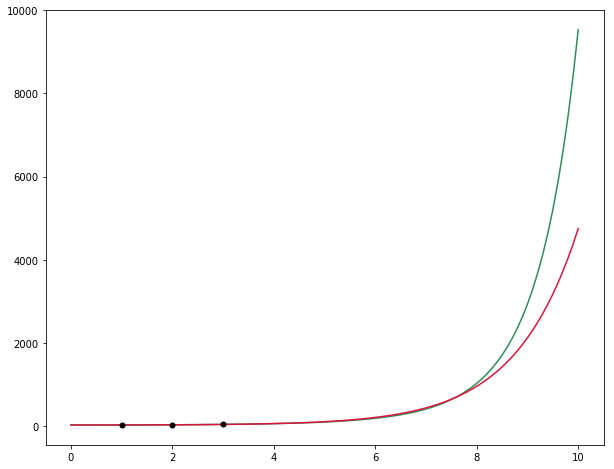

In [26]:
fig = plt.figure(figsize=(10,8))
x= np.linspace(0,10,101)
ax = fig.add_subplot(111)
ax.plot(x,age(x),color="seagreen")
ax.plot(x,age2(x),color="crimson")
ax.plot([1,2,3],[23,27,36],linestyle="none",marker="o",markersize=5,color="black")
# These two functions are strikingly close together.

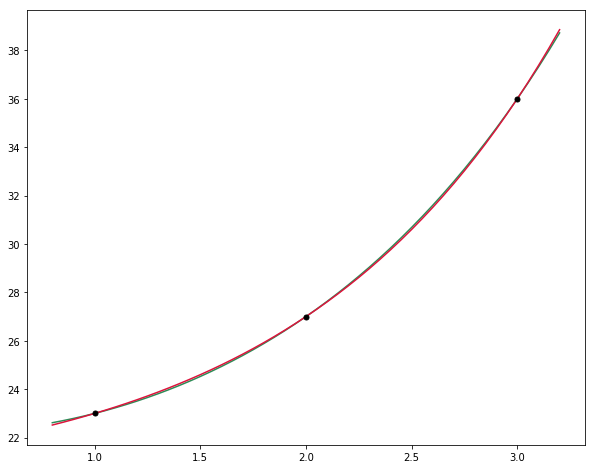

In [24]:
fig = plt.figure(figsize=(10,8))
x= np.linspace(.8,3.2,49)
ax = fig.add_subplot(111)
ax.plot(x,age(x),color="seagreen")
ax.plot(x,age2(x),color="crimson")
ax.plot([1,2,3],[23,27,36],linestyle="none",marker="o",markersize=5,color="black")
# These two functions are strikingly close together.

## May 20, 2019

Doing some Laplace transform stuff requiring partial fractions, which benefits greatly from numpy's matrix solver.

In [3]:
left = [[1,0,1,0],
       [-6,1,0,1],
       [15,-6,9,0],
       [0,15,0,9]]

right = [-1,2,-9,24]

print(np.linalg.solve(left, right))

[ 0.1  0.1 -1.1  2.5]


In [5]:
left = [[0,0,1,1],
       [0,1,4,0],
       [1,4,0,0],
       [4,0,0,0]]

right = [0,7,12,4]

g= np.linalg.solve(left, right)
g

array([ 1.    ,  2.75  ,  1.0625, -1.0625])

In [8]:
16*g

array([ 16.,  44.,  17., -17.])

In [12]:
left = [[1,0,1],
        [4,1,0],
        [0,4,1]]

right = [0,0,1]

g= np.linalg.solve(left, right)
g*17

array([-1.,  4.,  1.])

## May 21, 2019

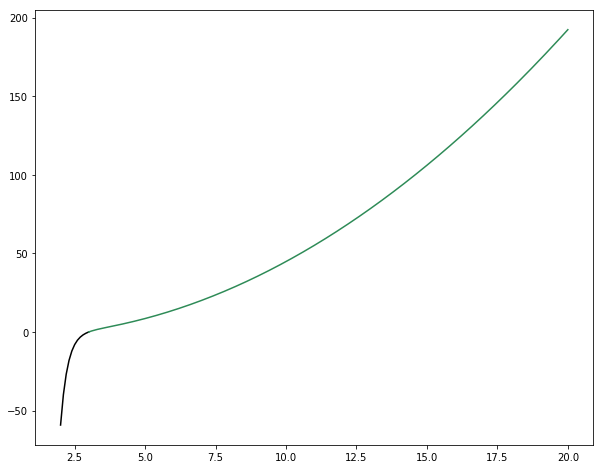

In [293]:
def f(x): return (1/16)*(8 * x**2 + 44 * x + 17 - 17 * np.exp(-4 * x))

fig = plt.figure(figsize=(10,8))
x1= np.linspace(2,3,11)
x2= np.linspace(3,20,171)
ax = fig.add_subplot(111)
ax.plot(x1,f(x1-3),color="black")
ax.plot(x2,f(x2-3),color="seagreen")

In [294]:
np.random.randn(11)/np.vectorize(np.math.factorial)(list(reversed(range(0,11))))

array([-3.87042249e-08, -1.49048190e-06,  4.51378119e-05,  2.26588478e-04,
       -4.40111894e-04, -9.57979062e-03, -5.37457666e-02,  8.30539318e-02,
       -6.93672762e-02, -1.68891712e-01,  9.49582601e-02])

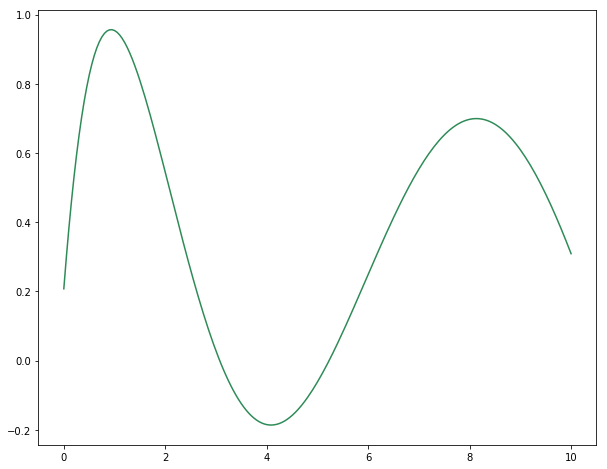

In [295]:
np.random.seed(55555)
f = np.poly1d(np.polyfit(np.arange(0,21),np.random.randn(21),7))

fig = plt.figure(figsize=(10,8))
x = np.linspace(0,10,201)
ax = fig.add_subplot(111)
ax.plot(x,f(x),color="seagreen")

## May 22, 2019

In [2]:
def factorial(n):
    if n <= 1: return 1
    else: return n * factorial(n - 1)

for i in range(0,9): print(factorial(i))

1
1
2
6
24
120
720
5040
40320


In [4]:
factorial(11)

39916800

In [6]:
def fib(n):
    if n <= 2: return 1
    return fib(n-2) + fib (n-1)

for i in range(1,23): print(fib(i))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711


In [9]:
left = [[1,1,0],
       [-1,0,1],
       [5,0,0]]
right = [2,-3,4]

g = np.linalg.solve(left,right)
g*5

array([  4.,   6., -11.])

In [12]:
left = [[1,1,0],
       [-1,2,1],
       [5,0,2]]
right = [0,0,1]

g = np.linalg.solve(left,right)
g*11

array([ 1., -1.,  3.])

In [14]:
left = [[1,1,0],
       [0,-1,1],
       [4,0,-1]]
right = [0,0,1]

g = np.linalg.solve(left,right)
g

array([ 0.2, -0.2, -0.2])

In [24]:
left = [[1,0,1,1],
       [-5,1,2,-7],
       [-14,-5,0,0],
       [0,-14,0,0]]

right = [0,0,0,1]

g= np.linalg.solve(left,right)
g*49*36

array([  45., -126.,    4.,  -49.])

In [25]:
49*36

1764

In [30]:
left = [[1,0,1,1],
       [3,1,1,2],
       [2,3,0,0],
       [0,2,0,0]]

right = [0,0,0,1]

g= np.linalg.solve(left,right)
g*12

array([-9.,  6., -3., 12.])

In [31]:
left=[[1,1],
      [1,2]]
right=[0,1]
np.linalg.solve(left,right)

array([-1.,  1.])

## May 23, 2019

Pascal's triangle

In [151]:
# Takes one Pascalian row as input and outputs the next.
def newslice(x):
    f=[1]               # Pad with a 1 at the head
    for i in range(0,len(x)-1):
        f.append(x[i]+x[i+1])
    f.append(1)         # And another 1 at the tail
    return f

# Returns a list of lists, each corresponding to a row of Pascal triangle with height n
def pascal(n):
    out=[[1]]
    for i in range(1,n):
        out.append(newslice(out[i-1]))
    return out

In [176]:
# Prints a centered triangle with horizontal spacing determined by t, extra line breaks by n
def formatter(g,t=4,n=1):
    for i in range(0,len(g)):
        print((("\t"*(len(g)-i-1))+"\t\t".join(map(str,g[i]))).expandtabs(t)+('\n'*n))

In [177]:
out = pascal(13)
formatter(out)

                                                1

                                            1       1

                                        1       2       1

                                    1       3       3       1

                                1       4       6       4       1

                            1       5       10      10      5       1

                        1       6       15      20      15      6       1

                    1       7       21      35      35      21      7       1

                1       8       28      56      70      56      28      8       1

            1       9       36      84      126     126     84      36      9       1

        1       10      45      120     210     252     210     120     45      10      1

    1       11      55      165     330     462     462     330     165     55      11      1

1       12      66      220     495     792     924     792     495     220     66      12      1



In [189]:
# Returns a black block if n is divisible by two, spaces otherwise
def bintoblock(n):
    if n%2: return u"\u2588"*2
    return "  "

# Convert a Pascal triangle into one shaded by even and odd
def mod2(out):
    out2=[]
    for i in out:
        out2.append(list(map(bintoblock,i)))
    return out2

In [198]:
# 역시나.....
def binformatter(g,t=4):
    for i in range(0,len(g)):
        print((("\t"*(len(g)-i-1))+"".join(map(str,g[i]))).expandtabs(t))
binformatter(mod2(pascal(32)),1)

                               ██
                              ████
                             ██  ██
                            ████████
                           ██      ██
                          ████    ████
                         ██  ██  ██  ██
                        ████████████████
                       ██              ██
                      ████            ████
                     ██  ██          ██  ██
                    ████████        ████████
                   ██      ██      ██      ██
                  ████    ████    ████    ████
                 ██  ██  ██  ██  ██  ██  ██  ██
                ████████████████████████████████
               ██                              ██
              ████                            ████
             ██  ██                          ██  ██
            ████████                        ████████
           ██      ██                      ██      ██
          ████    ████                    ████    ████
         ██  ██  ██  

In [221]:
two=[]
three=[]
five=[]
for i in range(0,500):
    two.append(np.mean(np.hstack(pascal(i)) % 2))
    three.append(np.mean(np.hstack(pascal(i)) % 3))
    five.append(np.mean(np.hstack(pascal(i)) % 5))

In [222]:
# Wow, that took a while
two[0:10],three[0:10]

([1.0,
  1.0,
  1.0,
  0.8333333333333334,
  0.9,
  0.7333333333333333,
  0.7142857142857143,
  0.6785714285714286,
  0.75,
  0.6444444444444445],
 [1.0,
  1.0,
  1.0,
  1.1666666666666667,
  0.9,
  0.8666666666666667,
  1.0,
  0.8928571428571429,
  0.9166666666666666,
  1.0222222222222221])

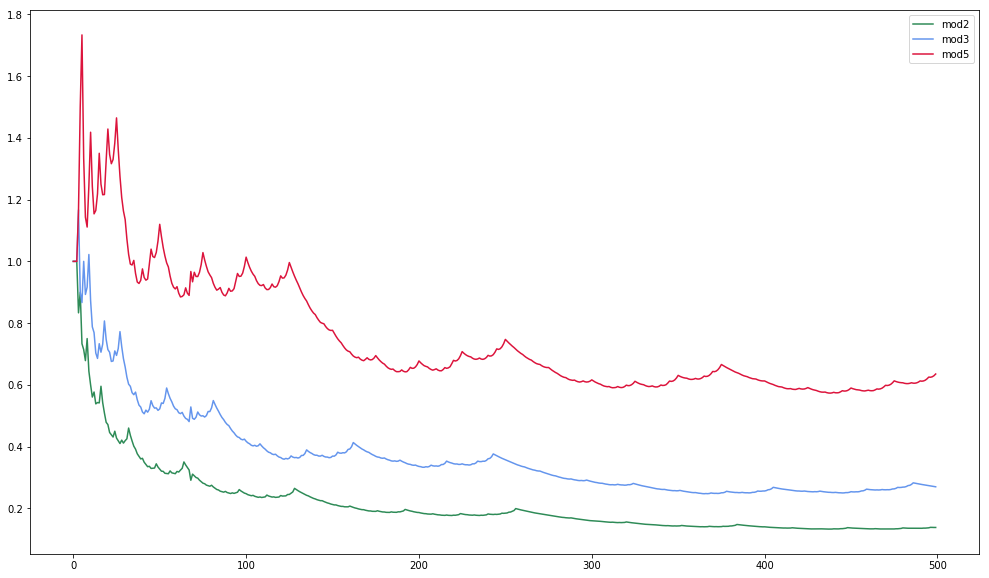

In [223]:
fig = plt.figure(figsize=(17,10))
x = list(range(0,500))
ax = fig.add_subplot(111)
ax.plot(x,two,color="seagreen",label="mod2")
ax.plot(x,three,color="cornflowerblue",label="mod3")
ax.plot(x,five,color="crimson",label="mod5")
ax.legend()

In [237]:
print(sum(ord(c) for c in "A Happy New Year to You!"))

2015


In [244]:
2*19*53

2014

In [298]:
print(ord('&')*ord('j')/len('NY'))

sum(b'Happy new year to you!')

2014.0


2014

&#25;

In [279]:
ord('¾')

190

In [411]:
# solution given online
def pascalin(n):
    if n == 1:
        return [1]
    else:
        line = [1]
        previous_line = pascalin(n-1)
        for i in range(len(previous_line)-1):
            line.append(previous_line[i] + previous_line[i+1])
        line += [1] # Equiv to line.append(1)
    return line




# My recursive version (not working)
def pascalR(x):
    if x==0: return [[1]]
    out=[]
    for n in range(1,x):
        prev = pascalR(n-1)[-1]
        f=[1]
        for i in range(0,len(prev)-1):
            f.append(prev[n]+prev[n+1])
        f.append(1)
        out.append(f)
    return out

In [410]:
pascalR(6)

IndexError: list index out of range

In [335]:
h = [8,9,564]

In [336]:
h+=[1]
h

[8, 9, 564, 1]

## May 24, 2019

In [9]:
A = [[2,-1,0],
     [-3,6,1]]
B = [[2,-4,5],
     [3,6,1]]
np.array(A) + np.array(B)

array([[ 4, -5,  5],
       [ 0, 12,  2]])

In [4]:
A = [[2,-1,0],
     [-3,6,1]]
B = [[1,0,-1,2],
     [-4,3,1,0],
     [0,3,0,-2]]
np.dot(A,B)

array([[  6,  -3,  -3,   4],
       [-27,  21,   9,  -8]])

In [12]:
A = [[-9,-18],
     [2,4]]
B = [[2,3,1],
     [-1,-6,7],
     [4,5,-1]]
np.linalg.det(A),np.linalg.det(B)
# Should be 0 and 42

(-1.9984014443252916e-15, 41.999999999999986)

In [46]:
A = [[2,1,1],
    [-5,-3,0],
    [1,1,-1]]
B = np.linalg.inv(A)
print(B)
print(np.round(np.dot(A,B))) # Round because it gave floating-point errors

[[-3. -2. -3.]
 [ 5.  3.  5.]
 [ 2.  1.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [47]:
A = [[1,-3],
     [-2,6]]
np.linalg.inv(A) # DNE, as expected

LinAlgError: Singular matrix

## May 27, 2019

In [17]:
A = [[2,7],
    [-1,-6]]

w,v = np.linalg.eig(A)
print(w) # eigenvalues
print(v) # v contains normalized eigenvectors, along the columns

[ 1. -5.]
[[ 0.98994949 -0.70710678]
 [-0.14142136  0.70710678]]


In [6]:
A = [[1,-1],
    [4/9,-1/3]]

w,v = np.linalg.eig(A)
print(w) # One EV with multiplicity 2 as expected

[0.33333333 0.33333333]


In [10]:
A = [[-4,-17],
    [2,2]]

w,v = np.linalg.eig(A)
print(w) # Complex EVs, one is the complex conjugate of the other

[-1.+5.j -1.-5.j]


In [19]:
A = 1 - np.identity(3)
A

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [20]:
w,v = np.linalg.eig(A)
print(w) # Complex EVs, one is the complex conjugate of the other
print(v)

[-1.  2. -1.]
[[-0.81649658  0.57735027  0.19219669]
 [ 0.40824829  0.57735027 -0.7833358 ]
 [ 0.40824829  0.57735027  0.59113912]]


In [26]:
print(str(v[:,0])+"\n")
for i in range(3): print(sum(v[:,i]**2))

[-0.81649658  0.40824829  0.40824829]

0.9999999999999999
1.0000000000000002
1.0


Explanation of this weird slicing:
<pre>
Returns
-------
w : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

v : (..., M, M) array
    The normalized (unit "length") eigenvectors, such that the
    column ``v[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``w[i]``.
</pre>
Summed squares show that the vector lengths have been normalized to 1.

In [28]:
for i in range(3): print(sum(v[:,i]**2)==1) # These rounding errors though ... 

False
False
True


In [33]:
print("hi") for i in range(3)

SyntaxError: invalid syntax (<ipython-input-33-c0dceff45857>, line 1)

## May 28, 2019

In [4]:
matrix = [[1,2],
          [3,2]]

inputs = np.array([[a,b] for a in range(-10,10) for b in range(-10,10)])

# Matrix contains a DE in matrix form
# Inputs contains a matrix of "coordinates" at which the DE should be evaluated

def normalize(matrix3):
    matrix3 = np.array(matrix3)
    return np.array([n / np.sqrt(sum(n**2)) for n in matrix3])

def trajectories(matrix,inputs,normal=False):
    out = [[np.dot(i,matrix[b]) for b in range(len(matrix))] for i in inputs]
    if normal: out = normalize(out) # How Paul gives his answer.
    return out

out = np.array(trajectories(matrix,inputs,True))

print(out)
print(inputs)

[[-0.51449576 -0.85749293]
 [-0.50387103 -0.8637789 ]
 [-0.49205726 -0.87056284]
 [-0.47885213 -0.87789557]
 [-0.46400699 -0.88583154]
 [-0.4472136  -0.89442719]
 [-0.42808634 -0.90373784]
 [-0.40613847 -0.91381155]
 [-0.38074981 -0.9246781 ]
 [-0.35112344 -0.93632918]
 [-0.31622777 -0.9486833 ]
 [-0.27472113 -0.96152395]
 [-0.22485951 -0.9743912 ]
 [-0.16439899 -0.98639392]
 [-0.09053575 -0.99589321]
 [ 0.         -1.        ]
 [ 0.11043153 -0.99388373]
 [ 0.24253563 -0.9701425 ]
 [ 0.3939193  -0.91914503]
 [ 0.5547002  -0.83205029]
 [-0.52510733 -0.85103601]
 [-0.51449576 -0.85749293]
 [-0.50262046 -0.86450719]
 [-0.48925097 -0.87214304]
 [-0.47409982 -0.8804711 ]
 [-0.45680468 -0.88956702]
 [-0.43690396 -0.89950816]
 [-0.41380294 -0.91036648]
 [-0.38672668 -0.92219438]
 [-0.35465423 -0.93499753]
 [-0.31622777 -0.9486833 ]
 [-0.26962993 -0.96296402]
 [-0.21242964 -0.97717636]
 [-0.14142136 -0.98994949]
 [-0.05255883 -0.99861783]
 [ 0.05872202 -0.99827437]
 [ 0.19611614 -0.98058068]
 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


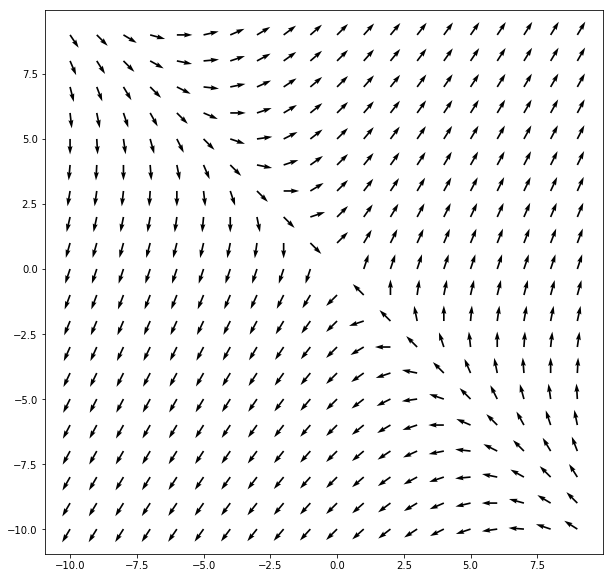

In [5]:
#out = np.array(trajectories(matrix,inputs))

U = out[:,0]
V = out[:,1]
X = inputs[:,0]
Y = inputs[:,1]

fig = plt.figure(figsize=(10,10))
x = np.linspace(0,10,201)
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V)

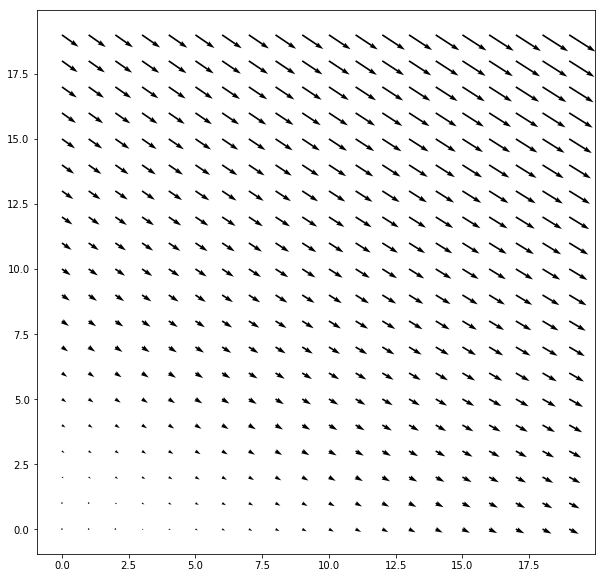

In [6]:
matrix2 = [[4,7],
         [-2,-5]]

inputs2 = np.array([[a,b] for a in range(20) for b in range(20)])

# Version that lets you use tuple unpacking as shown below
def trajectories2(matrix,inputs,normal=False):
    out = np.array([[np.dot(i,matrix[b]) for b in range(len(matrix))] for i in inputs])
    if normal: out = normalize(out)
    return inputs[:,0], inputs[:,1], out[:,0], out[:,1]

X, Y, U, V = trajectories2(matrix2,inputs2,False)

fig = plt.figure(figsize=(10,10))
x = np.linspace(0,10,201)
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


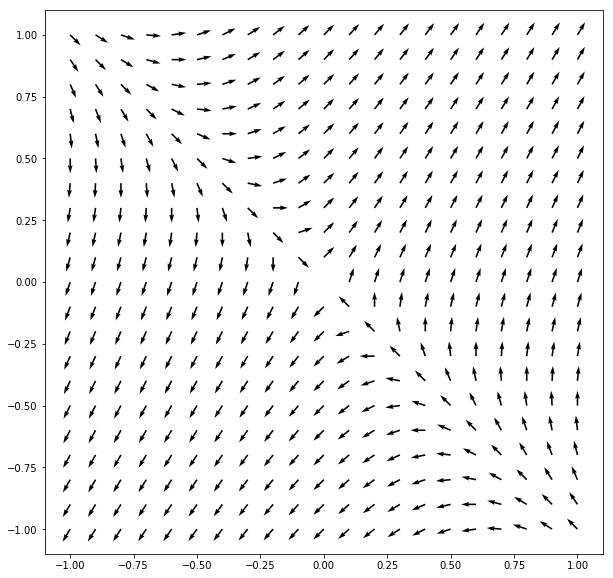

In [7]:
# Original matrix, but zooming in more
# You can see very clearly that the directional behavior has very distinct boundaries

matrix3 = [[1,2],
           [3,2]]

inputs3 = np.array([[a,b] for a in np.linspace(-1,1,21) for b in np.linspace(-1,1,21)])

X, Y, U, V = trajectories2(matrix3,inputs3,True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V)

# Divide by zero encountered in normalizing function; it plots normally so whatevs

In [8]:
matrix3 = np.array([[1,2],
                   [3,2],
                   [0,0]])
np.array([n / np.sqrt(sum(n**2)) for n in matrix3])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([[0.4472136 , 0.89442719],
       [0.83205029, 0.5547002 ],
       [       nan,        nan]])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


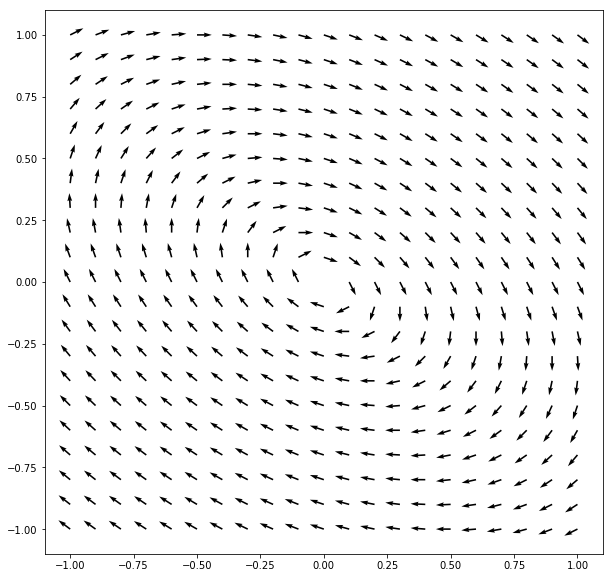

In [9]:
matrix3 = [[1,3],
           [-2,-1]]

inputs3 = np.array([[a,b] for a in np.linspace(-1,1,21) for b in np.linspace(-1,1,21)])

X, Y, U, V = trajectories2(matrix3,inputs3,True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V)

In [10]:
w, v = np.linalg.eig([[1,2],
              [3,2]])
w, v

(array([-1.,  4.]), array([[-0.70710678, -0.5547002 ],
        [ 0.70710678, -0.83205029]]))

In [11]:
A = [[2,1],
     [3,-1]]
B = [0,-4]

o = np.linalg.solve(A,B)
o * 5

array([-4.,  8.])

In [12]:
matrix = [[1,2],[3,2]]

# Particular solution worked out by hand
def x(t):
    coefs = [[2,1],
            [3,-1]]
    out = [np.dot([-0.8*np.exp(4*t),-0.8*np.exp(-t)],a) for a in matrix]
    return out

phase = np.array([x(t) for t in np.linspace(0,0.1,21)])


In [13]:
min(phase[:,0]), max(phase[:,0])

(-2.6411996269705518, -2.4000000000000004)

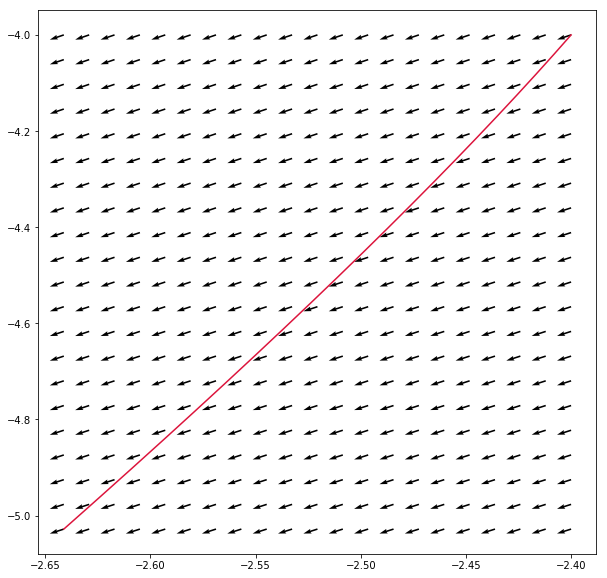

In [14]:
inputs = np.array([[a,b] for a in np.linspace(min(phase[:,0]),max(phase[:,0]),21) for b in np.linspace(min(phase[:,1]),max(phase[:,1]),21)])

X, Y, U, V = trajectories2(matrix,inputs,True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V,angles="xy")
ax.plot(phase[:,0], phase[:,1], color="crimson")

In [15]:
np.round(inputs3,1)[:10]

array([[-1. , -1. ],
       [-1. , -0.9],
       [-1. , -0.8],
       [-1. , -0.7],
       [-1. , -0.6],
       [-1. , -0.5],
       [-1. , -0.4],
       [-1. , -0.3],
       [-1. , -0.2],
       [-1. , -0.1]])

In [16]:
np.matrix("1 2; 2 3")

matrix([[1, 2],
        [2, 3]])

#### A good next step would be to make my function compatible with the numpy matrix class, shown above.
It allows for much easier input.

In [17]:
A = [[-5,1],
    [4,-2]]
w, v = np.linalg.eig(A)
w, v

(array([-6., -1.]), array([[-0.70710678, -0.24253563],
        [ 0.70710678, -0.9701425 ]]))

In [18]:
A = [[-5,1],
    [4,-2]]
np.linalg.solve(A,[1,2])

array([-0.66666667, -2.33333333])

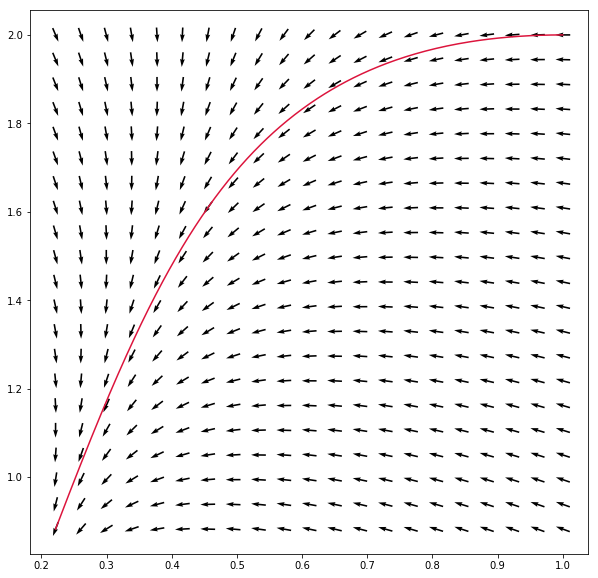

In [19]:
# Matrix form of DE
matrix = [[-5,1],
         [4,-2]]

# Particular solution worked out by hand
def x(t):
    coef = [[1,-1],
            [4,1]]
    out = [np.dot([0.6*np.exp(-t),-0.4*np.exp(-6*t)],a) for a in coef]
    return out

# t values we want to plot
phase = np.array([x(t) for t in np.linspace(0,1,501)])

# 21x21 grid of coordinates encompassing domain of those t values
inputs = np.array([[a,b] for a in np.linspace(min(phase[:,0]),max(phase[:,0]),21) for b in np.linspace(min(phase[:,1]),max(phase[:,1]),21)])

# Compute the phase portrait
X, Y, U, V = trajectories2(matrix,inputs,True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V,pivot="mid",angles="xy") # Plot phase portrait
ax.plot(phase[:,0], phase[:,1], color="crimson") # Plot the function

In [20]:
x(100) # Approaches the origin as x gets large

[2.2320455856125016e-44, 8.928182342450006e-44]

In [21]:
A = [[0,1],[1.5,-2.5]]
w, v = np.linalg.eig(A)
w, v

(array([ 0.5, -3. ]), array([[ 0.89442719, -0.31622777],
        [ 0.4472136 ,  0.9486833 ]]))

In [22]:
left = np.matrix("2 -1; 1 3")
right = [-4,9]
np.linalg.solve(left, right)*7

array([-3., 22.])

In [23]:
np.array(left)

array([[ 2, -1],
       [ 1,  3]])

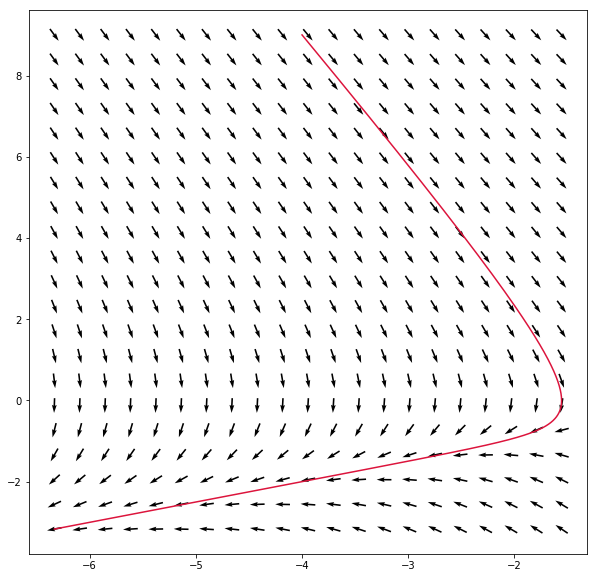

In [24]:
# Matrix form of DE
matrix = [[0,1],[1.5,-2.5]]

# Particular solution worked out by hand
def x(t):
    coef = np.array(left)
    out = [np.dot([-3*np.exp(t/2)/7,22*np.exp(-3*t)/7],a) for a in coef]
    return out

# t values we want to plot
phase = np.array([x(t) for t in np.linspace(0,4,501)])

# 21x21 grid of coordinates encompassing domain of those t values
inputs = np.array([[a,b] for a in np.linspace(min(phase[:,0]),max(phase[:,0]),21) for b in np.linspace(min(phase[:,1]),max(phase[:,1]),21)])

# Compute the phase portrait
X, Y, U, V = trajectories2(matrix,inputs,True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V,pivot="mid",angles="xy") # Plot phase portrait
ax.plot(phase[:,0], phase[:,1], color="crimson") # Plot the function

## June 4, 2019

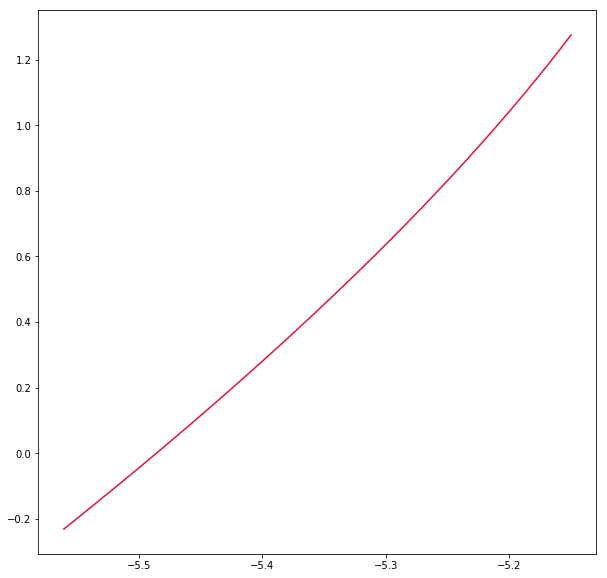

In [30]:
# Particular solution worked out by hand
def x(t):
    
    coefs = [[2,1,3,-11/4],
            [3,-1,-5/2,23/8]]
    out = [np.dot([-0.8*np.exp(4*t),-0.8*np.exp(-t),t,1],a) for a in coefs]
    return out

# t values we want to plot
phase = np.array([x(t) for t in np.linspace(0,0.1,501)])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(phase[:,0], phase[:,1], color="crimson") # Plot the function

In [27]:
phase

array([[-5.15000000e+00,  1.27500000e+00],
       [-5.17165354e+00,  1.17058352e+00],
       [-5.19504969e+00,  1.06368010e+00],
       ...,
       [-1.33363366e+07, -2.00045257e+07],
       [-1.37700012e+07, -2.06550228e+07],
       [-1.42177676e+07, -2.13266724e+07]])

In [31]:
left = [[1,0,1,1],
       [-3,1,3,-6],
       [-18,-3,0,0],
       [0,-18,0,0]]
right = [1,5,0,3]
g = np.linalg.solve(left, right)

In [36]:
g*108

array([  3., -18., 133., -28.])

In [39]:
(133 + 56) / 108 - 1

0.75

In [48]:
data = [np.random.binomial(40, 0.5) for i in range(10000)]

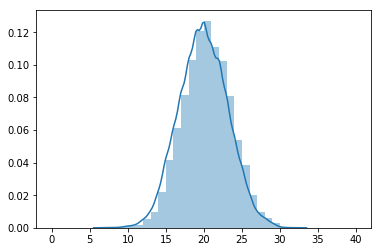

In [51]:
sns.distplot(data, bins = range(41))

In [55]:
min(data),max(data)

(7, 32)

In [4]:
4.0075e7 * 2 / np.pi - (4.0075e7 + 1) * 2 / np.pi

-0.6366197727620602

In [5]:
a=b=c=[]

In [6]:
a.append(4)

In [7]:
a

[4]

In [8]:
b

[4]

## June 11, 2019

In [7]:
# Particular solution worked out by hand
def y(t,c1,c2):
    return (c1 * np.cos(np.sqrt(3)*np.log(t)) + c2 * np.sin(np.sqrt(3)*np.log(t))) / t

In [48]:
# t values we want to plot
ins = np.linspace(0.05,1,501)
outs = [[y(t,c1,c2) for t in ins] for c1 in np.linspace(-2,2,5) for c2 in np.linspace(-2,2,5)]


In [49]:
len(outs)

25

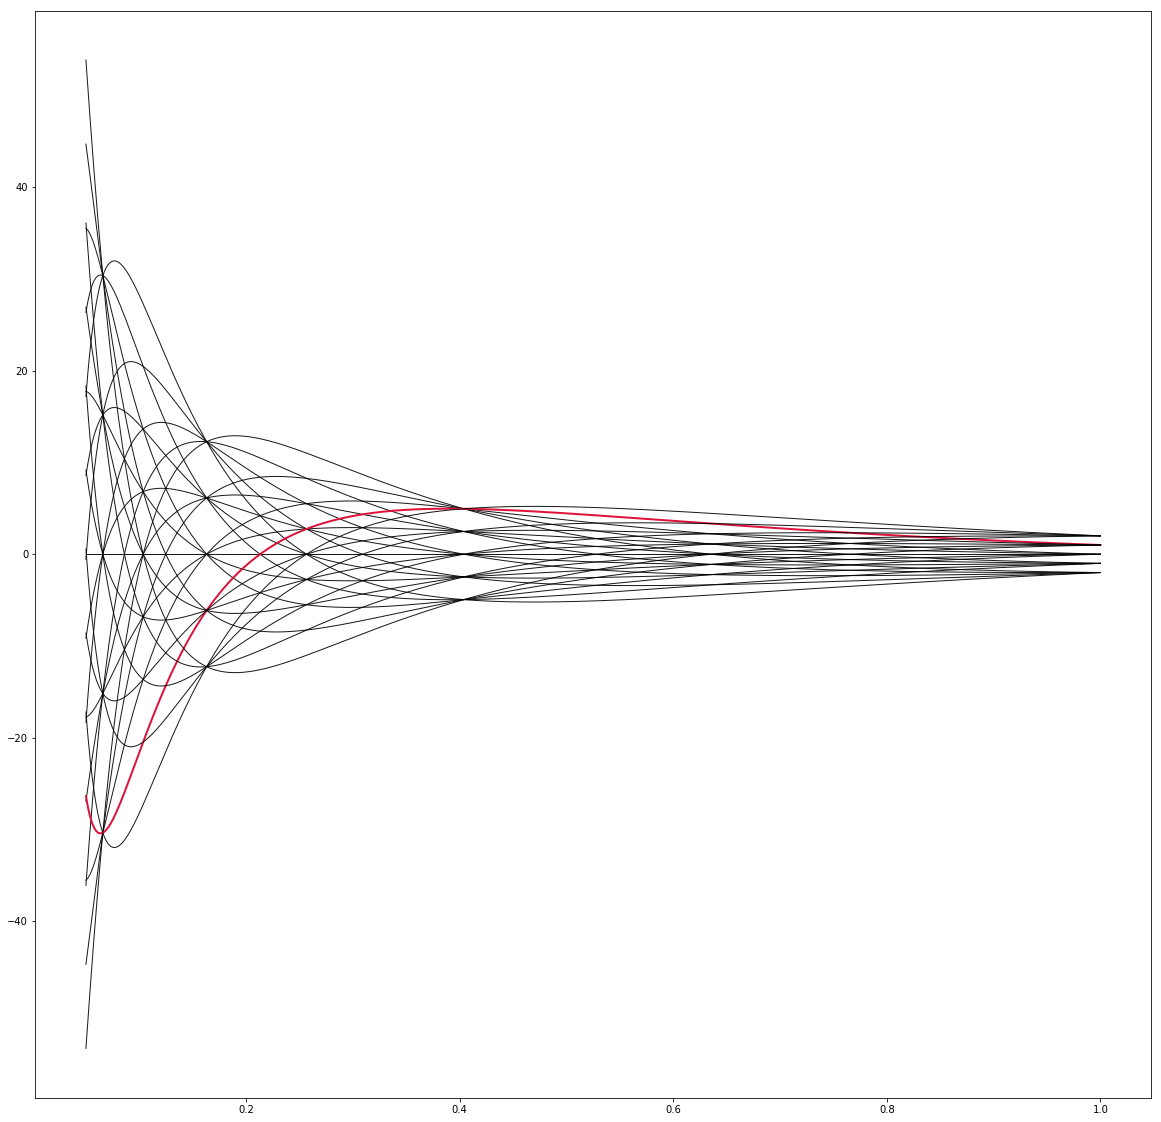

In [68]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
highlight = np.random.randint(25)
for i in outs:
    if i == outs[highlight]: ax.plot(ins, i, color="crimson",alpha=1,lw=2) # highlight a random solution
    else: ax.plot(ins, i, color="black",alpha=0.9,lw=1)

In [73]:
bytes(10)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [76]:
np.random.binomial(1000000,0.5)

500248

In [79]:
g = np.roots([1,-5,-22,56])
g

array([ 7., -4.,  2.])

In [109]:
def matrixer(d):
    roots = np.roots(d)
    return np.array([roots**n for n in range(len(roots))])

In [125]:
coefs = [1,-5,-22,56] # Coefs of the characteristic polynomial
right = [1,-2,-4] # Initial conditions
left = matrixer(coefs) # second row contains the r values
c = np.linalg.solve(left,right) # constants to satisfy ICs
list(zip(c*330, left[1])) # Easy to read output

[(-95.9999999999999, 7.000000000000005),
 (139.99999999999997, -4.000000000000003),
 (285.99999999999994, 2.0000000000000004)]

In [122]:
np.linalg.det(left)

330.0000000000008

In [130]:
coefs = [2,11,18,4,-8]
np.roots(coefs)

array([-1.99998323+0.00000000e+00j, -2.00000838+1.45230054e-05j,
       -2.00000838-1.45230054e-05j,  0.5       +0.00000000e+00j])

In [137]:
coefs = [1,12,104,408,1156,0]
np.roots(coefs)

array([-3.00000006+5.00000008j, -3.00000006-5.00000008j,
       -2.99999994+4.99999992j, -2.99999994-4.99999992j,
        0.        +0.j        ])

In [139]:
coefs = [1,0,0,0,64]
np.roots(coefs)

array([-2.+2.j, -2.-2.j,  2.+2.j,  2.-2.j])

## June 13, 2019

In [228]:
np.roots([1,-12,48,-64])

array([4.00001972+3.41629872e-05j, 4.00001972-3.41629872e-05j,
       3.99996055+0.00000000e+00j])

In [229]:
np.roots([1,-2,-21,-18])

array([ 6., -3., -1.])

In [265]:
grades= pd.read_csv("2학기 speaking test grades - 2·3학년.csv")

In [266]:
grades = grades[["Year","Present?","내용 / 30","유찬성 / 40","태도 / 30"]]
grades.columns = ["Year","Present","Content","Fluency","Attitude"]

# Change integer Present to a boolean
grades['Present']=grades['Present']==1

grades=grades[grades['Present']].drop('Present',axis=1)
grades

,Year,Content,Fluency,Attitude
0,2,30.0,40.0,30.0
1,2,30.0,40.0,30.0
2,2,30.0,40.0,30.0
3,2,30.0,40.0,30.0
4,2,30.0,40.0,30.0
5,2,30.0,40.0,30.0
6,2,30.0,40.0,30.0
7,2,30.0,40.0,30.0
8,2,30.0,40.0,30.0
9,2,30.0,40.0,30.0


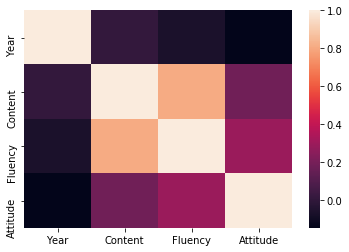

In [269]:
sns.heatmap(grades.corr())

In [272]:
# from tci-stats
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

In [277]:
cronbach_alpha(grades[["Content","Fluency","Attitude"]])

0.7189950756884912

In [278]:
grades.var()

Year          0.252088
Content      99.082719
Fluency     152.481572
Attitude     29.009009
dtype: float64

## June 25, 2019
Fourier sine series section from Paul's.

In [73]:
def f(x): 
    return 1 + x**2
def fo(x,m,L):
    return sum([2 * ( (2*L**2 - ((n*np.pi)**2)*(1+L**2)*(-1)**n) - 2*L**2 + (n*np.pi)**2 ) * np.sin(n*np.pi*x / L) / (n*np.pi)**3 for n in range(1,m+1)])

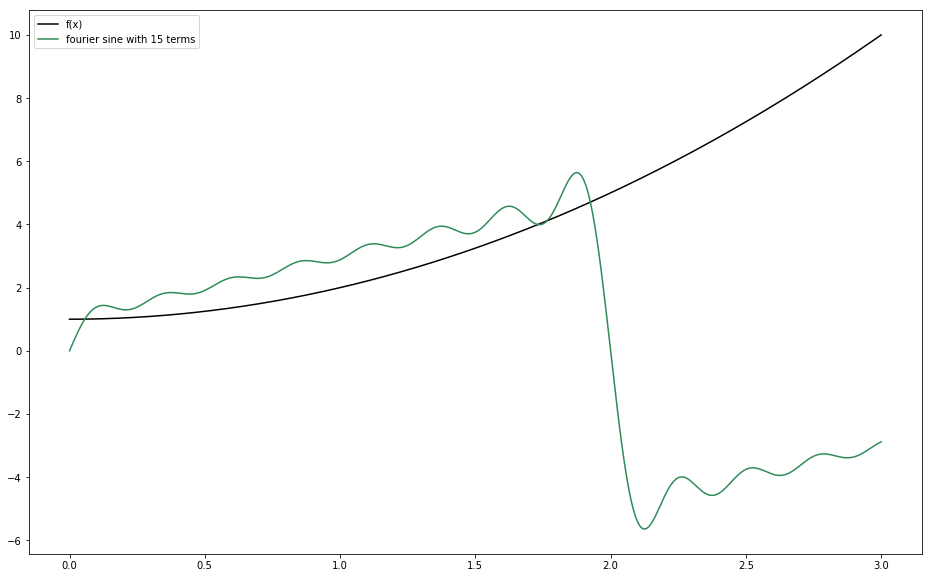

In [75]:
ins = np.linspace(0,3,361)
j = 15    # number of terms we want to go up to
outs = [[f(i) for i in ins]]+[[fo(i,m,2) for i in ins] for m in range(1,j+1)]

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(ins, outs[0], color="black",lw=1.5,label="f(x)")
ax.plot(ins, outs[-1], color="seagreen",lw=1.5,label="fourier sine with {} terms".format(j))
# for k in range(1,j+1):
#     ax.plot(ins,outs[j], color="black",lw=2,label="fourier with {} terms".format(k))
ax.legend()

In [64]:
def f(x,L): 
    return L - x
def fo(x,m,L):
    return L + sum([(2 * L * (-1)**n * np.sin(n*np.pi*x/L) / (np.pi*n)) for n in range(1,m+1)])

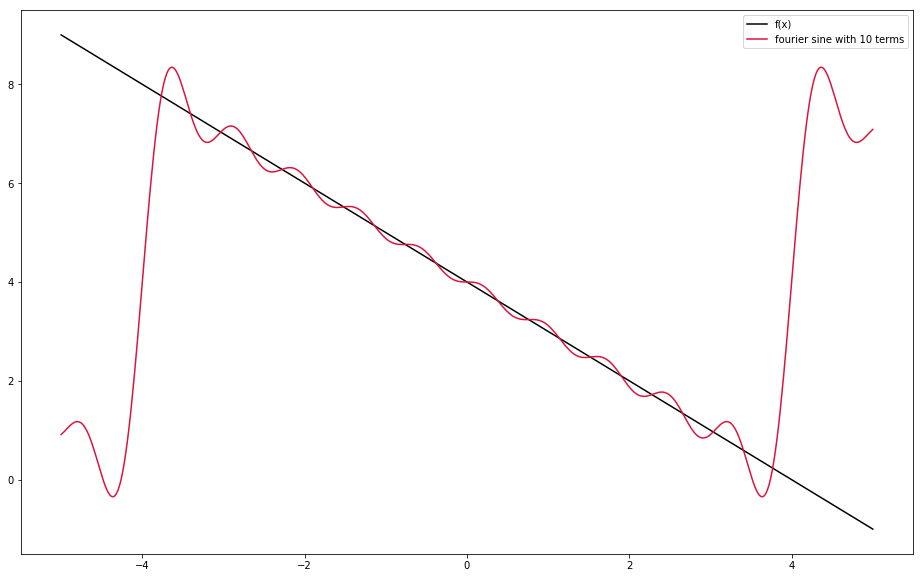

In [71]:
ins = np.linspace(-5,5,501)
j = 10    # number of terms we want to go up to
L = 4     # arbitrary
outs = [[f(i,L) for i in ins]] + [[fo(i,m,L) for i in ins] for m in range(1,j+1)]

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(ins, outs[ 0], color="black",   lw=1.5, label="f(x)")
ax.plot(ins, outs[-1], color="crimson", lw=1.5, label="fourier sine with {} terms".format(j))
# for k in range(1,j+1):
#     ax.plot(ins,outs[j], color="black",lw=2,label="fourier with {} terms".format(k))
ax.legend()

In [84]:
np.random.permutation([3,6,4,3,12])

array([ 3,  3,  6, 12,  4])

In [86]:
_

array([ 3,  3,  6, 12,  4])

In [87]:
[1 for _ in range(8)]

[1, 1, 1, 1, 1, 1, 1, 1]

In [88]:
[1]*8

[1, 1, 1, 1, 1, 1, 1, 1]

## July 1, 2019

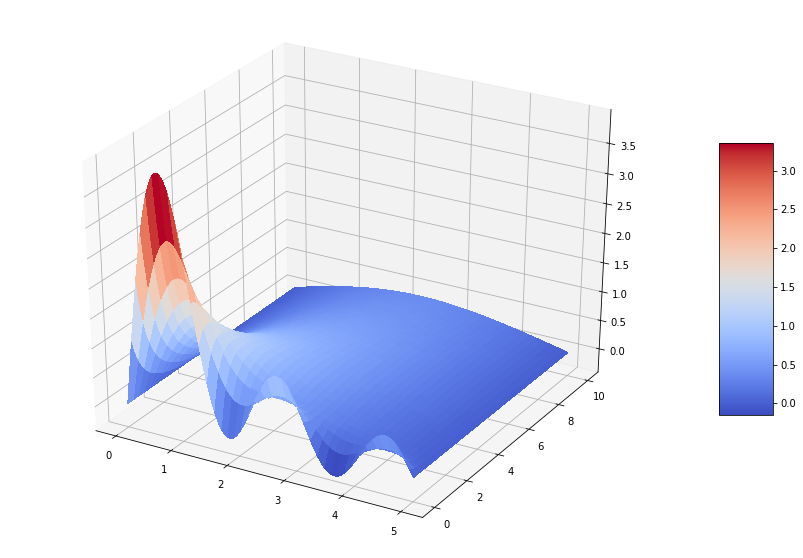

In [233]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

L = 5
# n = 1
k = .25

# Make data
x = np.linspace(0, 5, 251)
t = np.linspace(0, 10, 101)
x, t = np.meshgrid(x, t)
Z = sum([np.sin(n * np.pi * x / L) * np.exp(-k * t * (n * np.pi  / L)**2) for n in range(1,6)])

# Plot the surface
surf = ax.plot_surface(x, t, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=0)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

## July 8, 2019

In [114]:
left = [[2,1,0,0],
       [1,2,1,0],
       [0,1,2,1],
       [0,0,1,2]]

right = [0,0,0,5]

np.linalg.solve(left, right)

array([-1.,  2., -3.,  4.])

In [151]:
np.random.seed(78)
np.mean([scipy.linalg.lu(np.random.rand(3,3))[2][0,0] for _ in range(100)])

0.7316579610331861

In [149]:
np.random.rand(8)

array([0.91372033, 0.74926736, 0.89612123, 0.51535909, 0.64122504,
       0.02030903, 0.98259596, 0.5538396 ])

In [155]:
np.matrix([[0,-1],[1,0]]) ** 2

matrix([[-1,  0],
        [ 0, -1]])

In [156]:
np.matrix([[1,1],[-1,-1]]) ** 2

matrix([[0, 0],
        [0, 0]])

In [168]:
a= np.matrix([[-1,0],[0,1]])
b= np.matrix([[0,-1],[1,0]])
[a*b,-b*a]

[matrix([[0, 1],
         [1, 0]]), matrix([[0, 1],
         [1, 0]])]

In [163]:
np.array_equal(a*b, -b*a)

True

In [191]:
a,b,c= (np.matrix(np.eye(4)) for _ in range(3)) # this nonsense prevents them from all having the same identity
# various elimination matrices
a[1,0] = 1/2
b[2,1] = 2/3
c[3,2] = 3/4

# original matrix we are trying to solve
D = np.matrix('2 -1 0 0; -1 2 -1 0; 0 -1 2 -1; 0 0 -1 2')

In [192]:
c*b*a

matrix([[1.        , 0.        , 0.        , 0.        ],
        [0.5       , 1.        , 0.        , 0.        ],
        [0.33333333, 0.66666667, 1.        , 0.        ],
        [0.25      , 0.5       , 0.75      , 1.        ]])

In [193]:
c*b*a*D

matrix([[ 2.        , -1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.5       , -1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.33333333, -1.        ],
        [ 0.        ,  0.        ,  0.        ,  1.25      ]])

In [206]:
g = np.eye(4)*2-np.eye(4,k=-1)-np.eye(4,k=1)
g

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [211]:
scipy.linalg.lu(g)[2]

array([[ 2.        , -1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.5       , -1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.33333333, -1.        ],
       [ 0.        ,  0.        ,  0.        ,  1.25      ]])

In [214]:
left = [[1,1,1],[1,2,4],[1,3,9]]
right = [4,8,14]
np.linalg.solve(left, right)

array([2., 1., 1.])

In [219]:
left = np.matrix('2 1 1 ; 4 -6 0 ; -2 7 2')
np.matrix(scipy.linalg.lu(left)[1]) * np.matrix(scipy.linalg.lu(left)[2])

matrix([[ 4., -6.,  0.],
        [ 2.,  1.,  1.],
        [-2.,  7.,  2.]])

In [225]:
g = [np.matrix(t) for t in scipy.linalg.lu(left)]
g[0]*g[1]*g[2]

matrix([[ 2.,  1.,  1.],
        [ 4., -6.,  0.],
        [-2.,  7.,  2.]])

In [226]:
np.linalg.det(g)

array([-1.,  1., 16.])

In [231]:
np.linalg.det(np.matrix(''))

1.0